In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('sales_data.csv')

In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Date                0
Store ID            0
Product ID          0
Units Sold          0
Sales Amount        0
Discount Applied    0
Customer Segment    0
dtype: int64


In [4]:
# Fill missing values: Here, we'll fill numeric columns with the median and categorical columns with 'Unknown'
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].median())
df['Sales Amount'] = df['Sales Amount'].fillna(df['Sales Amount'].median())
df['Discount Applied'] = df['Discount Applied'].fillna(0)  # Assuming missing discount as 0
df['Customer Segment'] = df['Customer Segment'].fillna('Unknown')


In [5]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [6]:
# Handle any rows with invalid date formats by dropping them
df = df.dropna(subset=['Date'])

In [7]:
# Detecting and handling outliers in 'Sales Amount' using the IQR method
Q1 = df['Sales Amount'].quantile(0.25)
Q3 = df['Sales Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['Sales Amount'] < (Q1 - 1.5 * IQR)) | (df['Sales Amount'] > (Q3 + 1.5 * IQR))
df = df[~outliers]  # Removing outliers

In [8]:
# Display the cleaned data
print("Cleaned Data Preview:\n", df.head())

Cleaned Data Preview:
         Date Store ID Product ID  Units Sold  Sales Amount  Discount Applied  \
0 2024-06-11     S010       P012           4       4837.80              16.6   
1 2024-01-11     S001       P020          72       4144.57              17.5   
2 2024-04-11     S010       P003          67       3739.44              24.0   
3 2024-04-11     S001       P017         113        786.95               4.6   
4 2024-08-11     S003       P010          72       2388.25              25.2   

  Customer Segment  
0              New  
1          Premium  
2              New  
3              New  
4          Premium  


In [12]:
#Data Aggregation
# Aggregation by Date
sales_by_date = df.groupby('Date').agg({
    'Sales Amount': 'sum',
    'Units Sold': 'sum'
}).reset_index()
print("Sales by Date:\n", sales_by_date.head())

Sales by Date:
         Date  Sales Amount  Units Sold
0 2024-01-11     243210.84        6664
1 2024-02-11     252941.53        7220
2 2024-03-11     239792.02        7512
3 2024-04-11     282432.51        8672
4 2024-05-11     230809.64        7479


In [13]:
# Aggregation by Store
sales_by_store = df.groupby('Store ID').agg({
    'Sales Amount': 'sum',
    'Units Sold': 'mean'
}).reset_index()
print("Sales by Store:\n", sales_by_store.head())

Sales by Store:
   Store ID  Sales Amount  Units Sold
0     S001     210994.65   80.863158
1     S002     309891.81   76.258929
2     S003     232171.25   71.052632
3     S004     244614.21   71.761468
4     S005     264184.51   70.622449


In [14]:
# Aggregation by Product
sales_by_product = df.groupby('Product ID').agg({
    'Sales Amount': 'sum',
    'Units Sold': 'sum'
}).reset_index()
print("Sales by Product:\n", sales_by_product.head())

Sales by Product:
   Product ID  Sales Amount  Units Sold
0       P001     112334.62        2983
1       P002      80602.95        2496
2       P003      94528.26        2813
3       P004     138037.47        4204
4       P005     123002.05        3202


In [15]:
#Analysis
# Total and average sales per product
product_sales = df.groupby('Product ID').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Avg_Sales=('Sales Amount', 'mean')
).reset_index()
print("Total and Average Sales per Product:\n", product_sales)

Total and Average Sales per Product:
    Product ID  Total_Sales    Avg_Sales
0        P001    112334.62  2612.433023
1        P002     80602.95  2121.130263
2        P003     94528.26  2423.801538
3        P004    138037.47  2379.956379
4        P005    123002.05  2510.245918
5        P006    135847.94  2563.168679
6        P007    145919.59  2473.213390
7        P008     96636.67  2100.797174
8        P009    123893.66  2528.442041
9        P010    116304.83  2280.486863
10       P011    132374.52  2363.830714
11       P012    154761.12  2715.107368
12       P013    143644.13  2476.622931
13       P014    117350.57  2607.790444
14       P015    110687.23  2258.923061
15       P016    129742.49  2162.374833
16       P017    159966.73  3076.283269
17       P018    109770.69  2386.319348
18       P019    113100.48  2175.009231
19       P020     97907.60  2447.690000


In [16]:
# Identify store with highest sales
top_store = sales_by_store.loc[sales_by_store['Sales Amount'].idxmax()]
print("Top-Performing Store:\n", top_store)

Top-Performing Store:
 Store ID             S002
Sales Amount    309891.81
Units Sold      76.258929
Name: 1, dtype: object


In [17]:
# Analyze the impact of discounts on sales
discounted_sales = df[df['Discount Applied'] > 0]['Sales Amount'].sum()
non_discounted_sales = df[df['Discount Applied'] == 0]['Sales Amount'].sum()
print("Discounted Sales Total:", discounted_sales)
print("Non-Discounted Sales Total:", non_discounted_sales)

Discounted Sales Total: 2435525.67
Non-Discounted Sales Total: 887.93


In [18]:
#Visualisation
# Set up for visualizations
plt.style.use('seaborn')

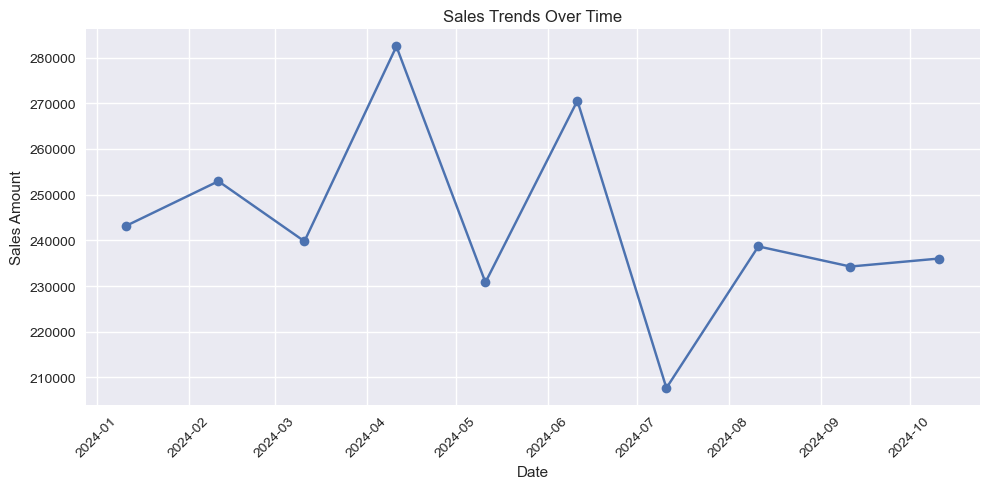

In [19]:

# Sales Trends Over Time
plt.figure(figsize=(10, 5))
plt.plot(sales_by_date['Date'], sales_by_date['Sales Amount'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

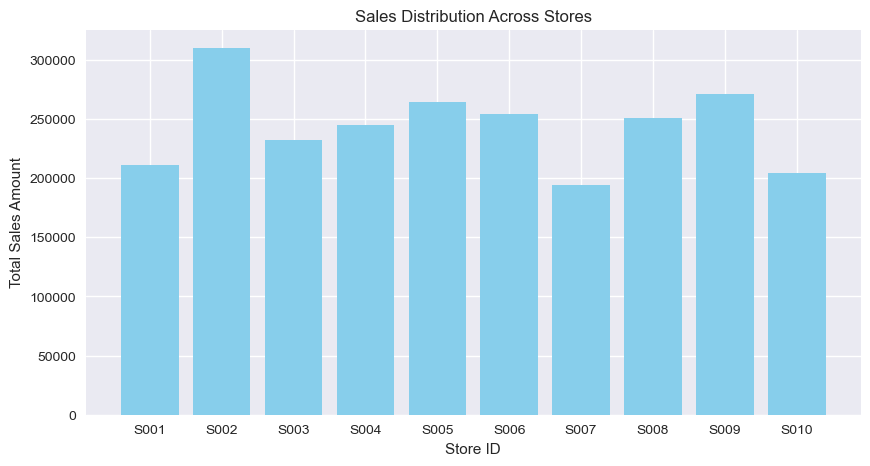

In [21]:
#Sales Distribution Across Stores
plt.figure(figsize=(10, 5))
plt.bar(sales_by_store['Store ID'], sales_by_store['Sales Amount'], color='skyblue')
plt.title('Sales Distribution Across Stores')
plt.xlabel('Store ID')
plt.ylabel('Total Sales Amount')
plt.show()

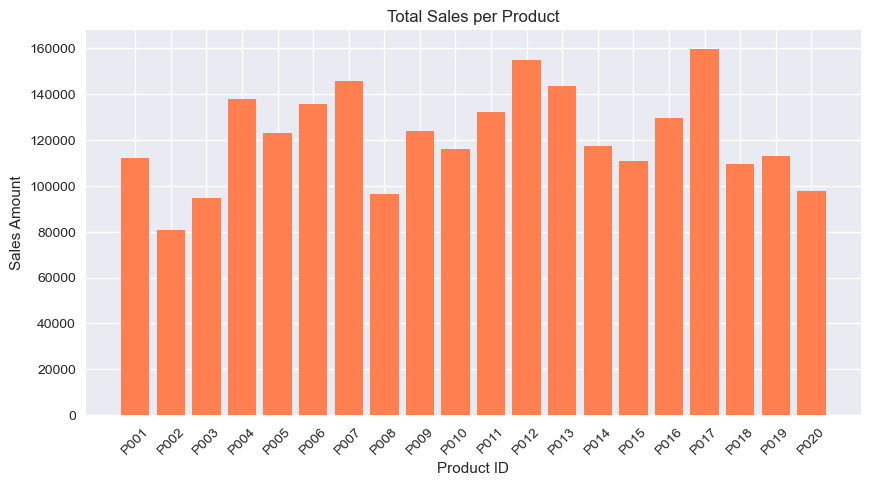

In [22]:
#Product Performance Comparison
plt.figure(figsize=(10, 5))
plt.bar(sales_by_product['Product ID'], sales_by_product['Sales Amount'], color='coral')
plt.title('Total Sales per Product')
plt.xlabel('Product ID')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()